In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h5>Problema #1:</h5>
<p>Desarrolle una funci´on que permita hacer la binarizaci´on de una imagen, para realizarlo puede
utilizar el enfoque que prefiera.</p>

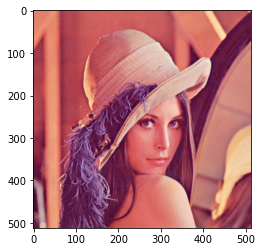

In [53]:
strImg = "image1.jpg"
img = cv2.imread(strImg) #lectura en formato BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img) #DIBUJA EN rgb
plt.show()

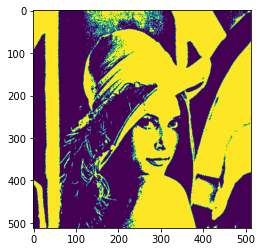

In [52]:
def binarizar_imagen(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, bw_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)   
    bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
    cv2.imwrite('imagen_binarizada.jpg', bw_img)
    return bw_img
    

plt.imshow(binarizar_imagen(img))
plt.show()

<h5>Problema #2:</h5>
<p>Desarrolle una funci´on que dada dos im´agenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla.</p>

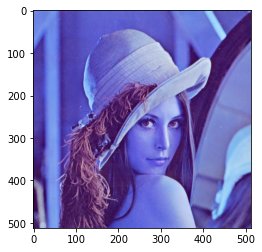

In [54]:
img1 = cv2.imread("image1.jpg")
plt.imshow(img1) #DIBUJA EN rgb
plt.show()

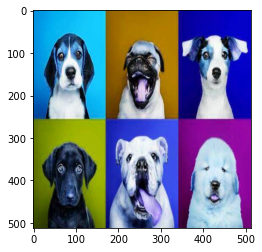

In [70]:
img2 = cv2.imread("image2.jpg")
plt.imshow(img2) #DIBUJA EN rgb
plt.show()

In [82]:
def operaciones_logicas(img1, img2):
    img1 = binarizar_imagen(img1)
    img2 = binarizar_imagen(img2)
    suma = img1+img2
    suma_img1 = img1 + 100
    suma_img2 = img2 + 100
    resta = img1-img2
    resta_img1 = img1 - 100
    resta_img2 = img2 - 100
    op_and = cv2.bitwise_and(img1, img2, mask = None)
    op_or = cv2.bitwise_or(img1, img2, mask = None)
    op_xor = cv2.bitwise_xor(img1, img2, mask = None)
#     plt.imshow(op_xor) #DIBUJA EN rgb
#     plt.show()
    return suma, suma_img1, suma_img2, resta, resta_img1, resta_img2, op_and, op_or, op_xor
    
# operaciones_logicas(img1, img2)

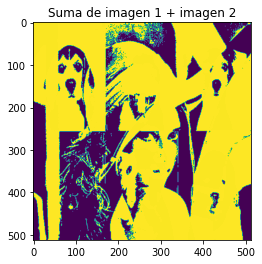

In [88]:
plt.imshow(operaciones_logicas(img1, img2)[0]) #DIBUJA EN rgb
plt.title('Suma de imagen 1 + imagen 2')
plt.show()

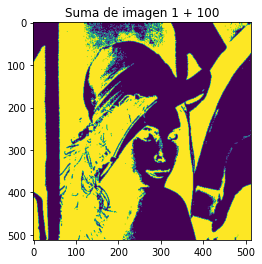

In [89]:
plt.imshow(operaciones_logicas(img1, img2)[1]) #DIBUJA EN rgb
plt.title('Suma de imagen 1 + 100')
plt.show()

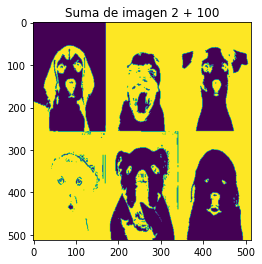

In [90]:
plt.imshow(operaciones_logicas(img1, img2)[2]) #DIBUJA EN rgb
plt.title('Suma de imagen 2 + 100')
plt.show()

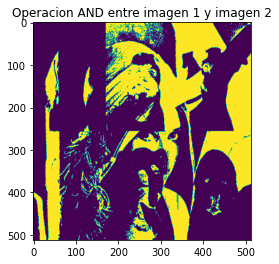

In [91]:
plt.imshow(operaciones_logicas(img1, img2)[3]) #DIBUJA EN rgb
plt.title('Operacion AND entre imagen 1 y imagen 2')
plt.show()

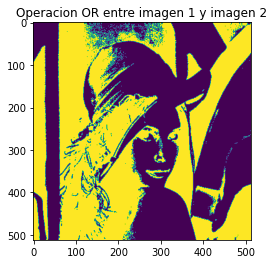

In [92]:
plt.imshow(operaciones_logicas(img1, img2)[4]) #DIBUJA EN rgb
plt.title('Operacion OR entre imagen 1 y imagen 2')
plt.show()

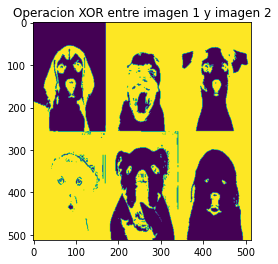

In [93]:
plt.imshow(operaciones_logicas(img1, img2)[5]) #DIBUJA EN rgb
plt.title('Operacion XOR entre imagen 1 y imagen 2')
plt.show()

<h5>Problema #3:</h5>
<p>Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.</p>

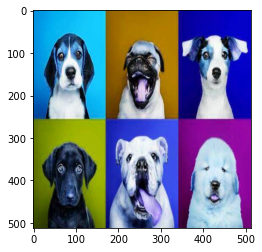

In [97]:
img2 = cv2.imread("image2.jpg")
plt.imshow(img2) #DIBUJA EN rgb
plt.show()

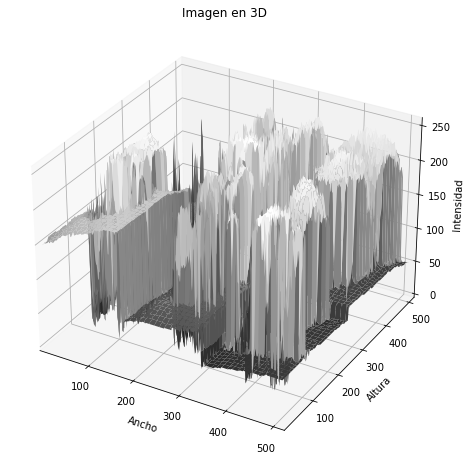

In [98]:
def imagen_3d(img, elev=None, azim=None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alto = img.shape[0]
    ancho = img.shape[1]
    
    y = np.linspace(0, alto, alto)
    x = np.linspace(0, ancho, ancho)
    
    xv, yv = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, img, cmap='gray', linewidth=0)

    ax.view_init(elev,azim)
    ax.set_title("Imagen en 3D")
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Altura')
    ax.set_zlabel('Intensidad')
    ax.set_xlim([1,ancho])
    ax.set_ylim([1,alto])
    ax.set_zlim([0,256])
    plt.show()
    
imagen_3d(img2)

<h5>Problema #4:</h5>
<p>Implemente una funci´on para cada una de las trasformaciones vistas en clase: negativa, lineal,
logar´ıtmica y exponencial.</p>

In [99]:
def imagen_negativa(img):
    img = 255 - img
    return img
def imagen_lineal(img, a, b):
    img = (a * img) + b
    return img
def imagen_logaritmica(img):
    img = np.array(img, dtype = np.uint16)
    a = 255 / np.log(1+ np.max(img))
    img = a * np.log(img)
    return img
def imagen_exponencial(img, a, g):
    img = a*(((img)/255)**g)
    return img

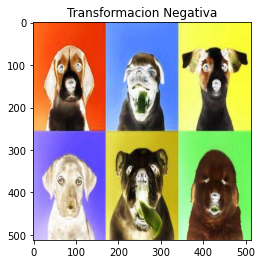

In [105]:
plt.imshow(imagen_negativa(img2)) #DIBUJA EN rgb
plt.title('Transformacion Negativa')
plt.show()

C:\Users\huber\AppData\Local\Temp\ipykernel_9132\412946573.py:10: RuntimeWarning: divide by zero encountered in log
  img = a * np.log(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


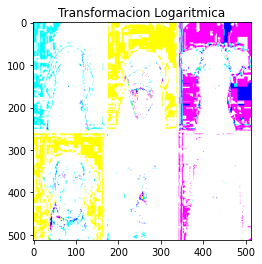

In [113]:
plt.imshow(imagen_logaritmica(img2)) #DIBUJA EN rgb
plt.title('Transformacion Logaritmica')
plt.show()

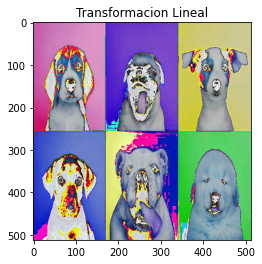

In [114]:
plt.imshow(imagen_lineal(img2, 1, 200)) #DIBUJA EN rgb
plt.title('Transformacion Lineal')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


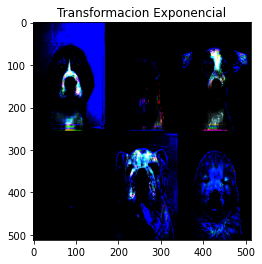

In [120]:
plt.imshow(imagen_exponencial(img2, 10, 50)) #DIBUJA EN rgb
plt.title('Transformacion Exponencial')
plt.show()

<h5>Problema #5:</h5>
<p>Desarrolle una funci´on que dada una imagen a color, cualquier kernel con cualquier dimensi´on
(3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano),
aplique un filtro de convoluci´on a dicha imagen y muestre la imagen original y la imagen filtrada.
Le recomendamos implementar el kernel como un arreglo de numpy.
</p>

In [123]:
ruta = "image2.jpg"
im = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
a = [ [ -1.0, 0.0, 1.0 ],
      [ -1.0, 0.0, 1.0 ],
      [ -1.0, 0.0, 1.0 ] ]
kernel = np.asarray(a)
dst = cv2.filter2D(im, -1, kernel)
print(dst.min(), dst.max())
norm = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
print(norm.min(), norm.max())
cv2.imwrite("dst.png", norm)
Image(filename="norm.png")

0 255
0 255


NameError: name 'Image' is not defined

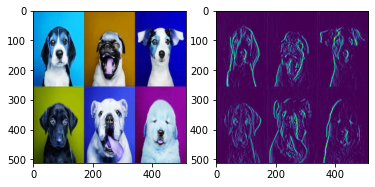

In [127]:
def convolucion(img):
    im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    a = [ [ -1.0, 0.0, 1.0 ],
      [ -1.0, 0.0, 1.0 ],
      [ -1.0, 0.0, 1.0 ] ]
    kernel = np.asarray(a)
    dst = cv2.filter2D(im, -1, kernel)
    norm = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
    cv2.imwrite("dst.png", norm)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img)
    axarr[1].imshow(norm)
#     plt.imshow(imagen_exponencial(img2, 10, 50)) #DIBUJA EN rgb
#     plt.title('Transformacion Exponencial')
#     plt.show()
convolucion(img2)

<h5>Problema #6:</h5>
<p>Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de
Canny para la detecci´on de bordes.</p>

<b>El kernel laplaciano es lo mismo que aplicar una segunda derivada y se utiliza para realzar detalles finos por lo que pone a cero zonas con poca variacion de intencidad. Mientras que el algorigmo de canny se basa en el gradiente y la supresion de falsos maximos.</b>

<h5>Problema Extra:</h5>
<p>Implemente una funci´on que sugiera si una imagen en escala de grises requiere o no la ecualizaci´on
de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significar´ıa que la imagen
no requiere ecualizaci´on y 1 significar´ıa que la imagen requiere ecualizaci´on fuertemente, si el valor
es mayor a 0.5 su funci´on debe realizar la ecualizaci´on de histograma vista en clase.</p>

In [128]:
strImg = "image1.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)

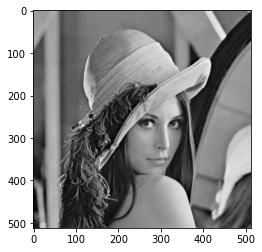

In [129]:
plt.imshow(img,cmap="gray")
plt.show()

In [130]:
alto = img.shape[0]
ancho = img.shape[1]
ecualizada = np.zeros((alto, ancho, 1)) #salida en escala de grises

In [131]:
frecuencias = np.zeros((256))

In [132]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        frecuencias[pixel] = frecuencias[pixel] + 1

In [133]:
densidades = np.true_divide(frecuencias, (alto*ancho))

In [134]:
cdfDensidad = np.cumsum(densidades, dtype = float) #cdf

In [135]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        newPixel = 255*cdfDensidad[pixel]
        ecualizada[i,j] = round(newPixel,0)

In [136]:
cv2.imwrite("ecualizada.jpg", ecualizada)

True

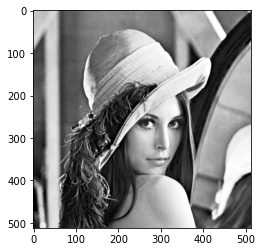

In [137]:
strImg = "ecualizada.jpg"
ecualizada = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(ecualizada,cmap="gray")
plt.show()

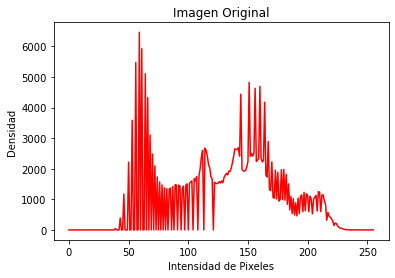

In [138]:
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist1, color="red")
plt.xlabel("Intensidad de Pixeles")
plt.ylabel("Densidad")
plt.title("Imagen Original")
plt.show()

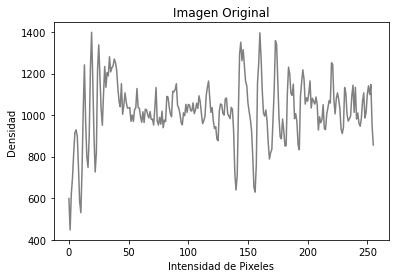

In [139]:
hist2 = cv2.calcHist([ecualizada], [0], None, [256], [0, 256])
plt.plot(hist2, color="gray")
plt.xlabel("Intensidad de Pixeles")
plt.ylabel("Densidad")
plt.title("Imagen Original")
plt.show()

<b>En teoria seria cuando la distribucion del histograma es uniforme ajustando una media probablemente</b>